In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tunisia-house-pricing/dataSetFull.csv


# Predicting Housing Prices with Linear Regression


### **Problem Statement**
The main task of this project is to $predict$ the price of a housing in Tunsia. The data is the result of scraping "various" house sales websites in result it contains more than 8000 observations with 25 attributes all rows correspond to a house, an apartment, or a villa within the country of Tunisia. We will use a statistical model like linear regression to $predict$ the housing market and interpret the model.


### **Exploratoray Data Analysis**


In [3]:
#loading Data
data = pd.read_csv('/kaggle/input/tunisia-house-pricing/dataSetFull.csv')

Checking if the data is missing values.

In [4]:
data.isnull().sum()

id                        0
price_tnd              1708
price_eur              1708
location                  0
city                   1316
governorate               0
Area                    185
pieces                 1189
room                    409
bathroom                659
age                    4145
state                  1100
latt                     35
long                     35
distance_to_capital      35
garage                    0
garden                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
dtype: int64

We notice that the collumn **'age'** is missing a great amount of values, this could affect our training data so it's better to lose the feature **'age'** than have significantly smaller training data.

In [5]:
#dropping age ,pieces and city
data.drop(['age','pieces','city'],inplace=True, axis=1)

Data after dropping few collumns.

In [6]:
data.isnull().sum()

id                        0
price_tnd              1708
price_eur              1708
location                  0
governorate               0
Area                    185
room                    409
bathroom                659
state                  1100
latt                     35
long                     35
distance_to_capital      35
garage                    0
garden                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
dtype: int64

Now we will remove all rows missing values.

In [7]:
data = data.dropna()
data.isnull().sum()

id                     0
price_tnd              0
price_eur              0
location               0
governorate            0
Area                   0
room                   0
bathroom               0
state                  0
latt                   0
long                   0
distance_to_capital    0
garage                 0
garden                 0
concierge              0
beach_view             0
mountain_view          0
pool                   0
elevator               0
furnished              0
equipped_kitchen       0
central_heating        0
air_conditioning       0
dtype: int64

We can also ged rid of the **'id'** and locations columns because they do not serve any purpose in our model, we'll get rid of **'price_eur'** aswell since we are focusing on the prices in TND.

In [8]:
data.drop(['id','price_eur','governorate','location','garden'],inplace=True, axis=1)
data.columns.values


array(['price_tnd', 'Area', 'room', 'bathroom', 'state', 'latt', 'long',
       'distance_to_capital', 'garage', 'concierge', 'beach_view',
       'mountain_view', 'pool', 'elevator', 'furnished',
       'equipped_kitchen', 'central_heating', 'air_conditioning'],
      dtype=object)

### Columns:
- `location`: the neighborhood of a given listing.
- `governorate`: the governorate of a given listing out of 24 Tunisian governorates.
- `area`: the area of a giving listing in square meters.
- `room`: the number of rooms.
- `bathroom`: the number of bathrooms.
- `state`: the state of a listing provided in 3 different values; 1 indicating it's in a normal state, 2 indicating it requires renovation and 0 indicating it's brand new.
- `latt`: latitude.
- `long`: longitude.
- `distance_to_capital`: the distance between a listing and the capital Tunis.
- `garden`: boolean, indicating the existence of a garden.
- `concierge`: boolean, indicating the existence of a concierge.
- `beach_view`: boolean, indicating whether the listing has a beach view or not.
- `mountain_view`: boolean, indicating whether the listing has a mountain view or not.
- `pool`: boolean, indicating the existence of a pool.
- `concierge`: boolean, indicating the existence of a concierge.
- `elevator`: boolean, indicating the existence of an elevator.
- `furnished`: boolean, indicating whether the listing is furnished or not.
- `equipped_kitech`: boolean, indicating whether the listing kitchen is equipped or not.
- `central_heating`: boolean, indicating whether the listing has central heating or not.
- `air_conditionting`: boolean, indicating whether the listing has air conditioning or not.

Exploring further our data:

In [9]:
data.describe()

,price_tnd,Area,room,bathroom,state,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,5.399000e+03,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000
mean,6.619039e+05,368.334692,3.276533,2.030191,1.385997,36.459699,10.406873,62.215593,0.477125,0.298574,0.113354,0.091128,0.246898,0.301537,0.044267,0.648824,0.627153,0.623634
std,8.577781e+05,1025.937907,1.922071,1.222101,0.568009,1.147717,0.394186,126.784273,0.499523,0.457675,0.317055,0.287818,0.431247,0.458968,0.205708,0.477382,0.483607,0.484518
min,6.500000e+03,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.342769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+05,117.000000,2.000000,1.000000,1.000000,36.401080,10.207432,11.345082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,175.000000,3.000000,2.000000,1.000000,36.830170,10.325278,17.722190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.600000e+05,362.500000,4.000000,3.000000,2.000000,36.876389,10.614570,71.252427,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.900000e+07,22000.000000,42.000000,14.000000,2.000000,37.363996,11.331493,4224.947771,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Inferences:
* The the 50th percentile, also know as the median, of `Area` is 175m.
* Out of all the boolean features, only `equpied_kitchen`, `central_heating` and `air_conditioning` have a median of 1.
* The minimum of latt and long is respectively 0, which means there are some observations with lattitude and longitude of zero. In reality it means that these houses are located in **Null Island**. Nonetheless, in the context of our data they will be considered as anomalies and in result they will be removed.


In [10]:
#dropping Null Island Houses
data.drop(data.index[data['latt'] == 0], inplace = True)
data.drop(data.index[data['long'] == 0], inplace = True)

### Exploring 75th percentile data

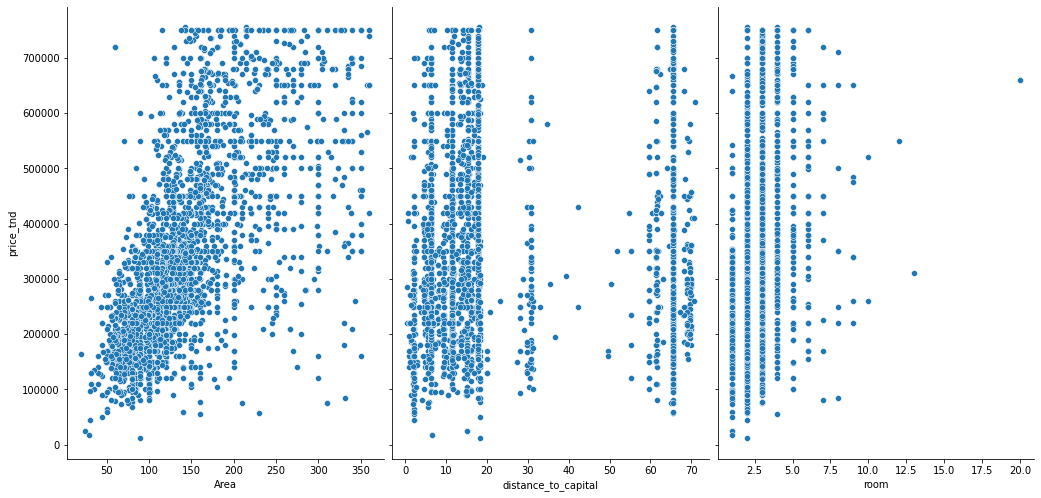

In [11]:
data_explore = data.query('price_tnd < 760000 and Area< 362 and distance_to_capital < 71')
sns.pairplot(data=data_explore,x_vars=['Area','distance_to_capital','room'],y_vars='price_tnd',height=7,aspect=.7);


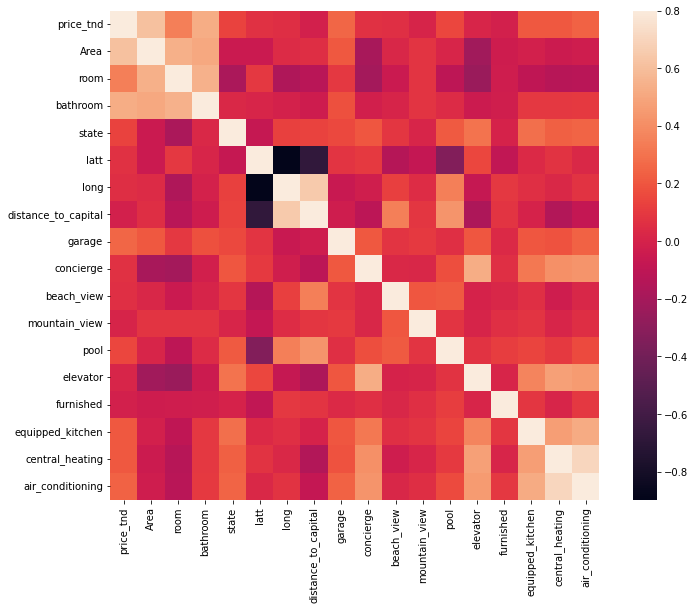

In [12]:
corrmat = data_explore.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Loads the Tunisian House Price Dataset
tunisia = data
X = pd.DataFrame(tunisia, columns=['Area', 'room', 'bathroom', 'state', 'latt', 'long',
       'distance_to_capital', 'concierge', 'beach_view',
       'mountain_view', 'pool', 'air_conditioning',
       'central_heating'])
Y = pd.DataFrame(tunisia, columns=["price_tnd"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
Permutation explainer: 541it [07:06,  1.25it/s]                         


In [ ]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# California Housing Prices
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

### Inferences:
We notice that `price_tnd` is mostly correlated with the columns `Area`, `rooms` and `bathrooms`.